# Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

# Parameters
m = 1
Nk = 201
kys =np.linspace(-np.pi, np.pi, Nk)
kxs =np.linspace(-np.pi, np.pi, Nk)

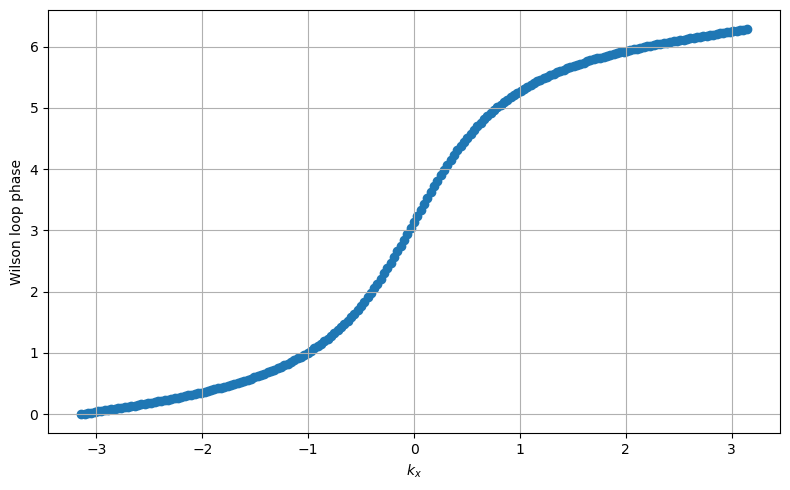

In [3]:
# Chern insulator Hamiltonian
def hamiltonian(kx, ky, m):
    H = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
    return H

# Wilson loop operator
def wilson_loop(kx_fixed, m):
    overlaps = []
    for i in range(Nk):
        ky1 = kys[i]
        ky2 = kys[(i+1) % Nk]
        H1 = hamiltonian(kx_fixed, ky1, m)
        H2 = hamiltonian(kx_fixed, ky2, m)
        _, v1 = np.linalg.eigh(H1)
        _, v2 = np.linalg.eigh(H2)

        u1 = v1[:, 0] #lowest band only (0) because we're interested in the occupied band
        u2 = v2[:, 0]
        overlap = np.vdot(u1, u2)
        overlaps.append(overlap)
    
    W = np.prod(overlaps) 
    
    return np.angle(W)

# Wilson loop phases
kxs =np.linspace(-np.pi, np.pi, Nk)
phases = [wilson_loop(kx,m) for kx in kxs]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(kxs, np.unwrap(phases))
plt.xlabel("$k_x$")
plt.ylabel("Wilson loop phase")
plt.grid(True)
plt.tight_layout()
plt.show()
